In [1]:
import random
import numpy;




In [2]:
def getInitialPoblation(sizePoblation,sizeElement,args):
  poblation=[]
  for y in range(sizePoblation):
    element=[]
    for x in range(sizeElement):
      element.append(random.randint(0,1))
    poblation.append(elementClass(element,args['min'],args['max']))

  return poblation

In [3]:
#    math.ceil(math.log(1 + ((args.x_max - args.x_min)/args.tol), 2))

def getArraySize(args):
  return math.ceil(math.log(1 + ((args['max'] - args['min'])/args['tol']), 2))
   

In [4]:
import operator

def etilist(poblation,reverse,poblationSize):
  et=(poblationSize*2/100)

  poblation.sort(key=operator.attrgetter('adaptation'), reverse=reverse)

  for idx, element in enumerate(poblation):
    if(idx<et):
      element.isElite=True
    else:
      element.isElite=False
      
  return poblation[0:poblationSize]
   


In [5]:
def couplesRoullete(poblation,total):
  sumAdaptation=0
  totalPoblation=len(poblation)
  for x in range(totalPoblation):
    sumAdaptation=sumAdaptation+poblation[x].adaptation

  pi=[]
  qi=[]
  for x in range(totalPoblation):
    poblation[x].pi=(poblation[x].adaptation/sumAdaptation)
    if(x!=0):
      poblation[x].qi=(poblation[x].pi+poblation[x-1].qi)
    else:
      poblation[x].qi=(poblation[0].pi)  

  selection=[]
  for x in range(total):
    s1=numpy.random.random_sample()
    for y in range((totalPoblation)):
      if s1<poblation[y].qi:
        c1=y
        
    selection.append(poblation[c1])   

  return selection;



In [6]:
def mutation(poblation,prob):
  for element in  poblation:
    s1=numpy.random.random_sample()
    if s1<=prob and not element.isElite:
      element.mutation();
  return poblation





In [7]:
import math

class elementClass:
  
  def __init__(self, binaryData,min,max):
    self.binaryData = binaryData
    self.min=min
    self.max=max
    self.intValue=self.getIntegerValue()
    self.floatValue=self.getFloatValue()
    self.adaptation=self.adaptationForm()
    self.qi=0
    self.pi=0
    self.isElite=False
    #print(self.floatValue)
    #print(self.adaptation)
    #print("")
    
  def mutation(self):
    elementSize=len(self.binaryData)
    index= random.randint(0,elementSize-1)
    if self.binaryData[index]==1:
      self.binaryData[index]=0
    else:
      self.binaryData[index]=1
    self.intValue=self.getIntegerValue()
    self.floatValue=self.getFloatValue()
    self.adaptation=self.adaptationForm()



  def getFloatValue(self):
    return self.min+self.intValue*( (self.max-self.min)/ (  (2**len(self.binaryData)) -1))

  def getIntegerValue(self): 
    binary = ''.join(map(str,self.binaryData)) 
    return (int(str(binary), 2))
    
  def adaptationForm(self):
    #return (20+math.exp(1)-20*math.exp(-0.2*abs(self.floatValue)) - math.exp(math.cos(2*3.1416*self.floatValue)))
    #return self.floatValue + abs(math.sin(32*math.pi*self.floatValue))
    #return  - abs(self.floatValue* (math.sin ( math.sqrt(abs(self.floatValue))    ) )  )
    return 1+((math.cos(self.floatValue))/(1+0.01*self.floatValue**2))
    #return  ((math.sin(self.floatValue))/( 1 + math.sqrt( self.floatValue) +   ((math.cos(self.floatValue))/(1+self.floatValue))  ))

 

In [8]:
def reproduction(prob,selection,elementSize):
  couples=[]

  for x in range(len(selection)):
    if(numpy.random.random_sample()<=prob):
      couples.append(selection[x])
  
  if len(couples) %2 !=0:
    couples.pop()

  
  cruce=random.randint(1,elementSize-1)
  sons=[]
  for x in range(0,len(couples),2):
    son1=couples[x].binaryData[0:cruce]+couples[x+1].binaryData[cruce:elementSize-1]
    son2=couples[x+1].binaryData[0:cruce]+couples[x].binaryData[cruce:elementSize-1]
    sons.append(elementClass(son1,couples[x].min,couples[x].max))
    sons.append(elementClass(son2,couples[x].min,couples[x].max))
  return sons

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

args={'min':0,'max':50,'tol':0.00001}

elementSize=getArraySize(args)
poblationSize=10
newPoblation=getInitialPoblation(poblationSize,elementSize,args)

generations=10000
reverse=False
sons=[]
gainM=[]

for x in range(generations): 
  newPoblation=etilist(newPoblation+sons,reverse,poblationSize)

  gainM.append(newPoblation[0].floatValue)
  if x == (generations-1):
    break;
    
  selection=couplesRoullete(newPoblation,poblationSize)
  sons=reproduction(0.90,selection,elementSize)
  sons=mutation(sons,0.1)
  

print(newPoblation[0].adaptation)
print(newPoblation[0].floatValue)
print(newPoblation[0].intValue)
print(newPoblation[0].binaryData)
 


0.08836339524191461
3.0852921212415985
258813
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]


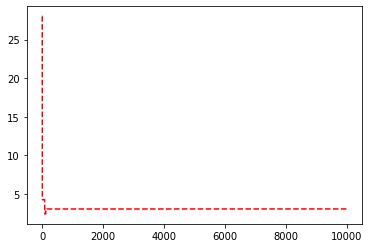

In [13]:
import numpy as np

plt.plot(range(0,generations), gainM, 'r--')
plt.show()